## Numpy

KeyWord

- numpy
- ndarray
- Handling shape
- Indexing
- Slicing
- Creation function
- Operation functions
- array operations
- Comparisons
- Boolean index
- Fancy Index
- numpy data i/o

코드를 방정식 리스트로 표현하기

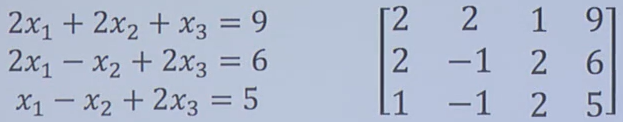

In [1]:
coefficient_matrix = [ [2,2,1], [2,-1,2], [1,-1,2] ]
constant_vector = [9,6,5]

데이터가 큰 경우, 굉장히 느린 방법.

따라서 Numpy 사용.

- Numerical Python.
- 파이썬의 고성능 과학 계산용 패키지.
- Matrix와 Vector와 같은 Array 연산의 사실상 표준.

- 일반 List에 비해 빠르고, 메모리 효율이 좋음.
- 반복문 없이 데이터 배열에 대한 처리 지원.
- 선형대수 관련 다양한 기능을 제공.

In [78]:
import numpy as np

# Array Creation

### ndarray

- Numpy 에서 기본이 되는 단위.
- np.array를 활용하여 배열을 생성.
- 하나의 데이터 type만 배열에 넣을 수 있음.
- Dynamic typing not supported (List와 가장 큰 차이점)
    - 선언 시점이 아닌 실행 시점에 data type을 결정.
- C의 Array를 사용하여 배열을 생성.

In [4]:
test_array = np.array([1,4,5,8], float)
print(test_array)

[1. 4. 5. 8.]


In [7]:
type(test_array[3])

numpy.float64

In [9]:
# Dynamic typing not supported -> 속도가 빠름.
test_array = np.array(['1','4',5,8], float)
print(test_array)

[1. 4. 5. 8.]


In [10]:
type(test_array[0])

numpy.float64

하나의 element가 차지하는 메모리 공간이 64비트이다.

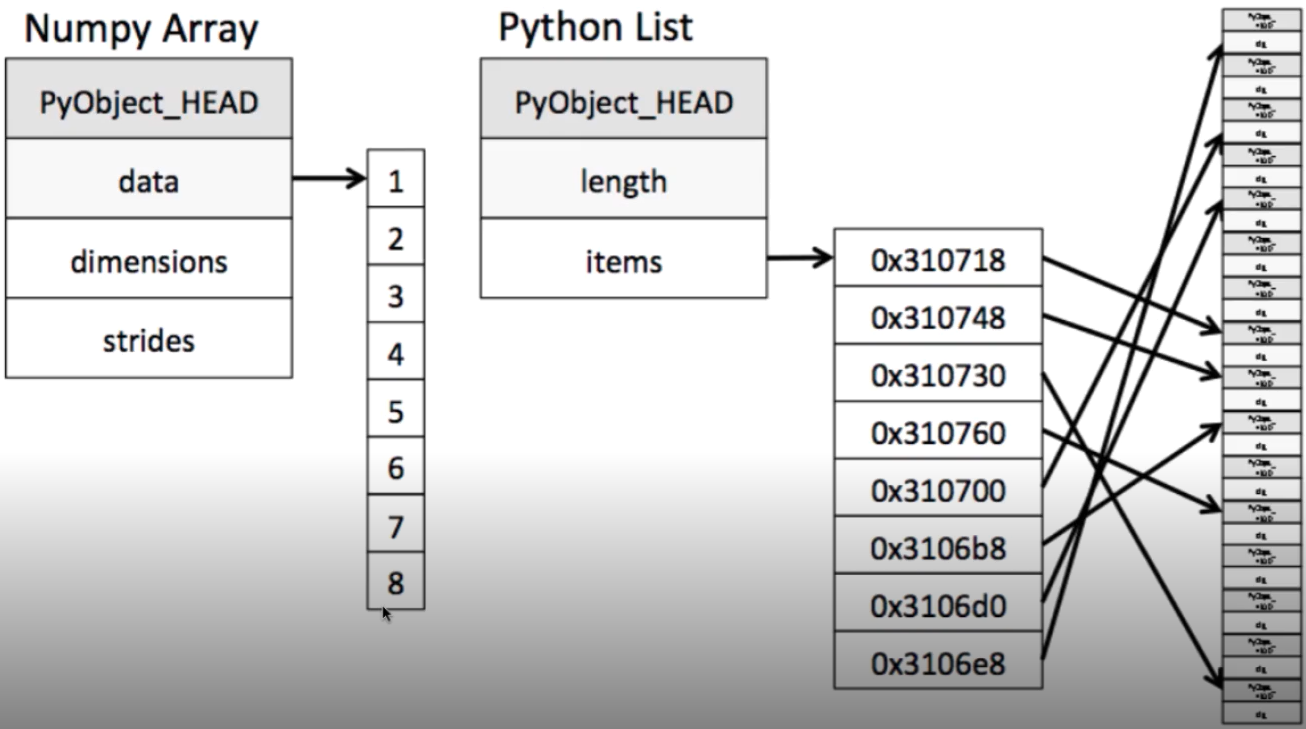

ndarray의 경우, 메모리에 데이터를 순서대로 쌓는다.

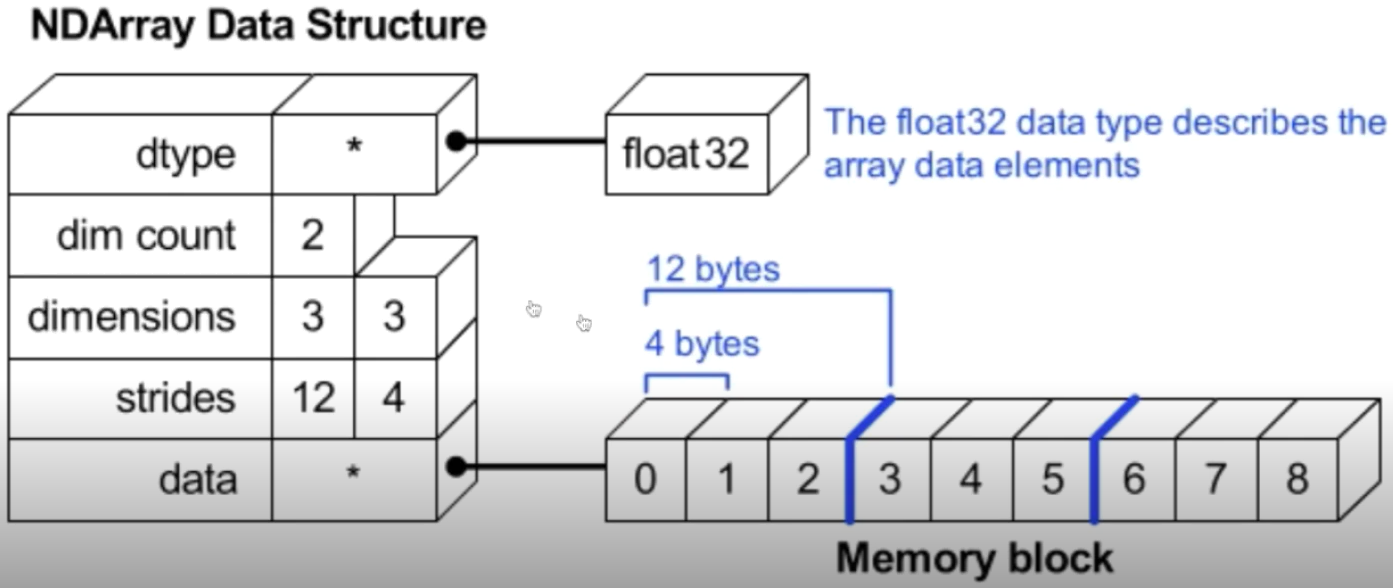

### Array shape

- shape: numpy array object의 dimension 구성을 반환.
- dtype: numpy array의 데이터 type을 반환.

1-dimension vector

In [6]:
test_array = np.array([1,4,5, '8'], float) # String Type의 데이터를 입력해도
print(test_array)
print(type(test_array[3])) # Float Type으로 자동 형변환 실시.
print(test_array.dtype) # Array 전체의 데이터 type을 반환.
print(test_array.shape) # Array의 shape을 반환.

[1. 4. 5. 8.]
<class 'numpy.float64'>
float64
(4,)


(column,)

- [1., 4., 5., 8.] 은 one-dimension. (tensor라고 부름)
- 따라서 (4,)로 반환. tuple 타입으로 반환.

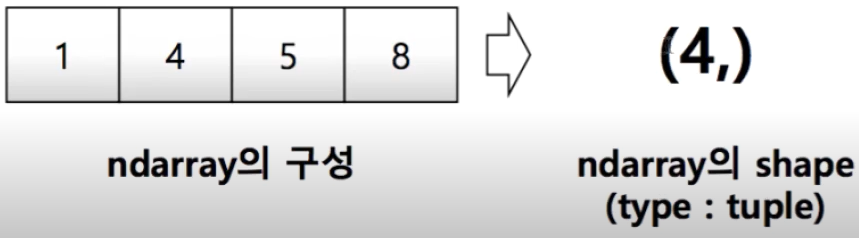

In [7]:
test_array = np.array([[1,4,5, '8']], float)
print(test_array)
print(test_array.shape)

[[1. 4. 5. 8.]]
(1, 4)


- Matrix로 봤을 때, [1, 4, 5, 8] 형태.
- 1 * 4 행렬.

Array shape (matrix)

In [9]:
matrix = [[1,2,5,8], [1,2,5,8], [1,2,5,8]]
np.array(matrix, int).shape

(3, 4)

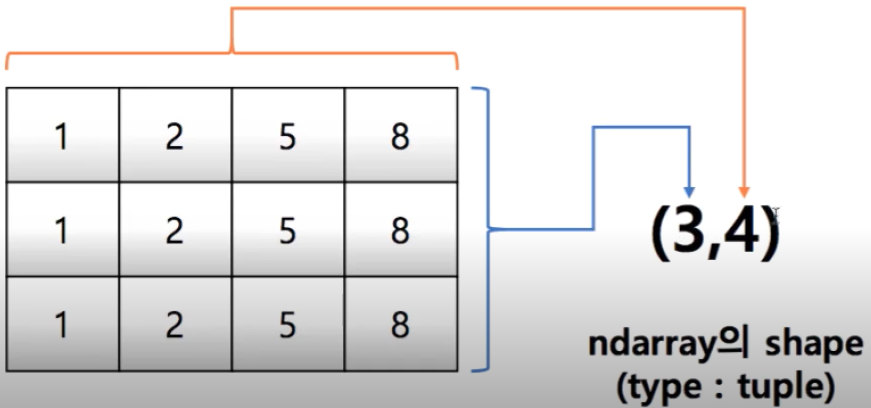

(row, column)

3rd order tensor

In [10]:
tensor = [[[1, 2, 5, 8], [1, 2, 5, 8], [1, 2, 5, 8]],
          [[1, 2, 5, 8], [1, 2, 5, 8], [1, 2, 5, 8]],
          [[1, 2, 5, 8], [1, 2, 5, 8], [1, 2, 5, 8]],
          [[1, 2, 5, 8], [1, 2, 5, 8], [1, 2, 5, 8]]]

np.array(tensor, int).shape

(4, 3, 4)

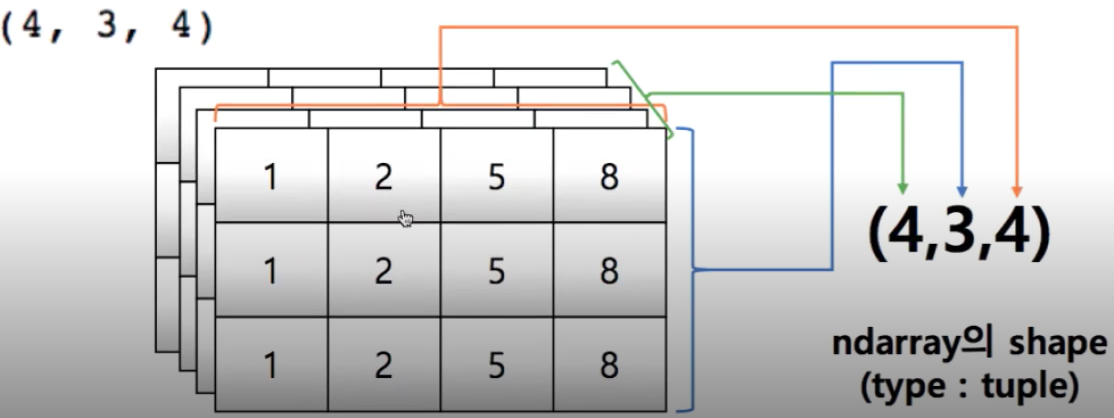

(tensor depth, row, column)

### Array shape - ndim & size

- ndim: number of dimension
- size: data의 개수

In [11]:
tensor = [[[1, 2, 5, 8], [1, 2, 5, 8], [1, 2, 5, 8]],
          [[1, 2, 5, 8], [1, 2, 5, 8], [1, 2, 5, 8]],
          [[1, 2, 5, 8], [1, 2, 5, 8], [1, 2, 5, 8]],
          [[1, 2, 5, 8], [1, 2, 5, 8], [1, 2, 5, 8]]]

In [12]:
np.array(tensor, int).ndim # 3차원. scalar값으로, int로 반환.

3

In [13]:
np.array(tensor, int).size # 12 * 4

48

### Array dtype

- ndarray의 single element가 가지는 data type
- 각 element가 차지하는 memory의 크기가 결정.

In [14]:
np.array([[1, 2, 3], [4.5, 5, 6]], dtype=int)

array([[1, 2, 3],
       [4, 5, 6]])

In [15]:
np.array([[1, 2, 3], [4.5, '5', '6']], dtype=np.float32)

array([[1. , 2. , 3. ],
       [4.5, 5. , 6. ]], dtype=float32)

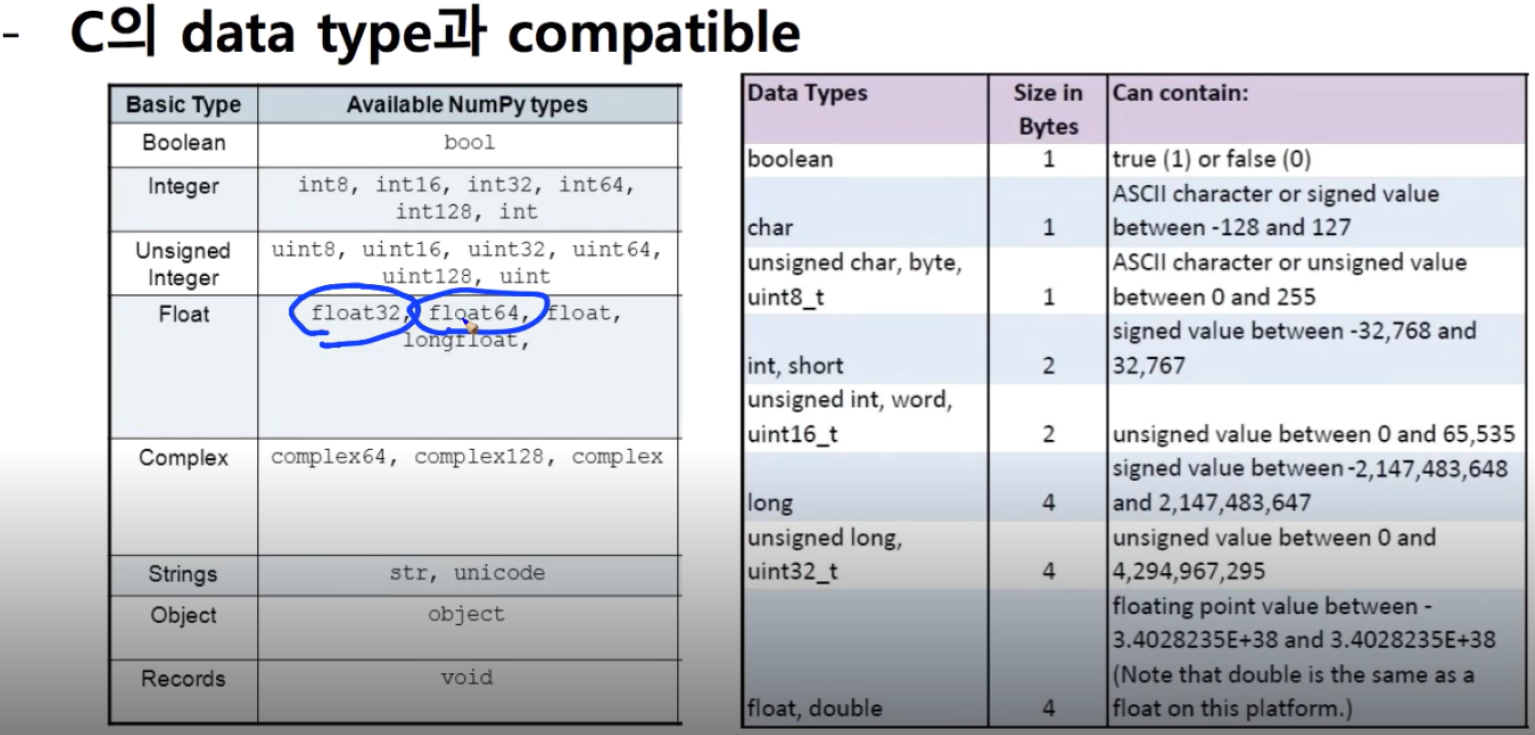

- nbytes: ndarray object의 메모리 크기를 반환.

In [16]:
np.array([[1, 2, 3], [4.5, '5', '6']], dtype=np.float32).nbytes

24

32bits = 4bytes -> 6 * 4bytes

In [17]:
np.array([[1, 2, 3], [4.5, '5', '6']], dtype=np.int8).nbytes

6

8bits = 1byte -> 6 * 1byte

In [18]:
np.array([[1, 2, 3], [4.5, '5', '6']], dtype=np.float64).nbytes

48

64bits = 8bytes -> 6 * 48bytes

## Handling Shape

### reshape

- Array의 shape 크기를 변경. (element의 개수는 동일)
- size는 그대로, shape은 변경.

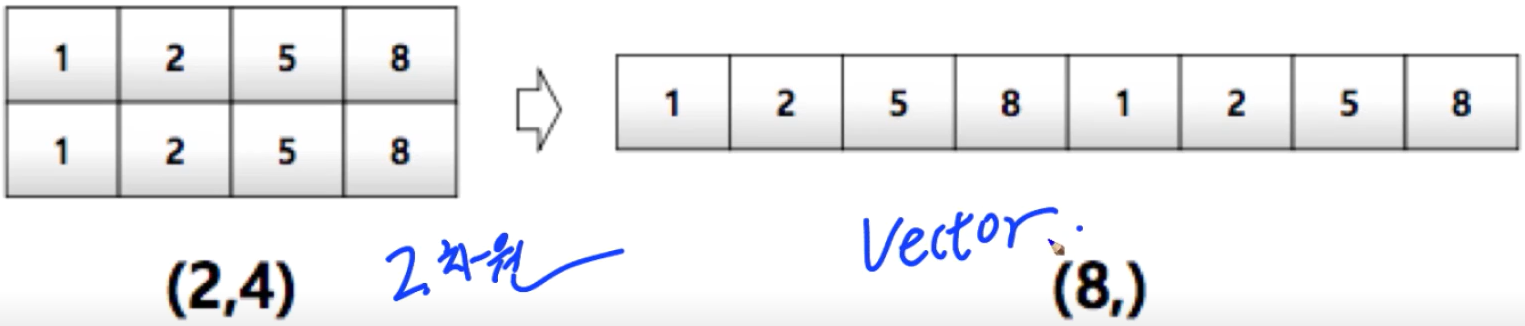

보통 머신러닝에서 y는 vector 형태인 경우가 많음.

sklearn에서는 이를 matrix 형태로 집어넣어야 하기 때문에 쓰임.

In [19]:
test_matrix = [[1, 2, 3, 4], [1, 2, 5, 8]]
np.array(test_matrix).shape

(2, 4)

In [23]:
np.array(test_matrix).reshape(2, 2, 2)

array([[[1, 2],
        [3, 4]],

       [[1, 2],
        [5, 8]]])

In [20]:
np.array(test_matrix).reshape(8, )

array([1, 2, 3, 4, 1, 2, 5, 8])

In [21]:
np.array(test_matrix).reshape(8, ).shape

(8,)

Array의 size만 같다면 다차원으로 자유로이 변형가능

In [24]:
np.array(test_matrix).reshape(2, 4).shape

(2, 4)

-1: size를 기반으로 row 개수 선정.
- row의 개수를 정확하게 모를 때.

In [25]:
np.array(test_matrix).reshape(-1, 2).shape

(4, 2)

In [26]:
np.array(test_matrix).reshape(2, 2, 2)

array([[[1, 2],
        [3, 4]],

       [[1, 2],
        [5, 8]]])

In [27]:
np.array(test_matrix).reshape(2, 2, 2).shape

(2, 2, 2)

y가 50 size의 vector인 경우, (-1, 50)으로 선언하면 똑같은 size의 matrix로 reshape.

In [28]:
test = np.array(test_matrix).reshape(8,)
test

array([1, 2, 3, 4, 1, 2, 5, 8])

In [29]:
test.reshape(-1, 1)

array([[1],
       [2],
       [3],
       [4],
       [1],
       [2],
       [5],
       [8]])

### flatten

- 다차원 array를 1차원 array로 변환.
- reshape으로 해도 상관은 없음.

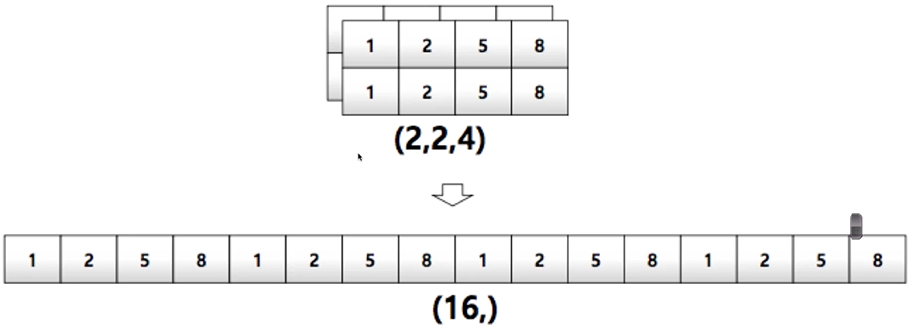

In [31]:
test_matrix = [[[1,2,3,4], [1,2,5,8], [1,2,3,4], [1,2,5,8]]]
np.array(test_matrix).flatten()

array([1, 2, 3, 4, 1, 2, 5, 8, 1, 2, 3, 4, 1, 2, 5, 8])

## Indexing & slicing

### 1. indexing

- List와 달리 이차원 배열에서 [0, 0] 과 같은 표기법을 제공함.
- Matrix일 경우 앞은 row 뒤는 column을 의미.

In [33]:
a = np.array([[1,2,3], [4.5,5,6]], int)
print(a)
print(a[0,0]) # Two dimensional array representation # 1
print(a[0][0]) # Two dimensional array representation # 2

# a[row column]
# a[row][column]

[[1 2 3]
 [4 5 6]]
1
1


In [34]:
a[0,0] = 12 # Matrix 0,0 에 12 할당
print(a)

[[12  2  3]
 [ 4  5  6]]


In [35]:
a[0][0] = 5 # Matrix 0,0 에 12 할당
print(a)

[[5 2 3]
 [4 5 6]]


### 2. slicing

- List와 달리 행과 열 부분을 나눠서 slicing이 가능함.
- Matrix의 부분 집합을 추출할 때 유용함.

- for문을 사용하지 않아도 됨.

In [37]:
a = np.array([[1,2,3,4,5], [6,7,8,9,10]], int)

In [38]:
a[:, 2:] # All Row / 2~ column

array([[ 3,  4,  5],
       [ 8,  9, 10]])

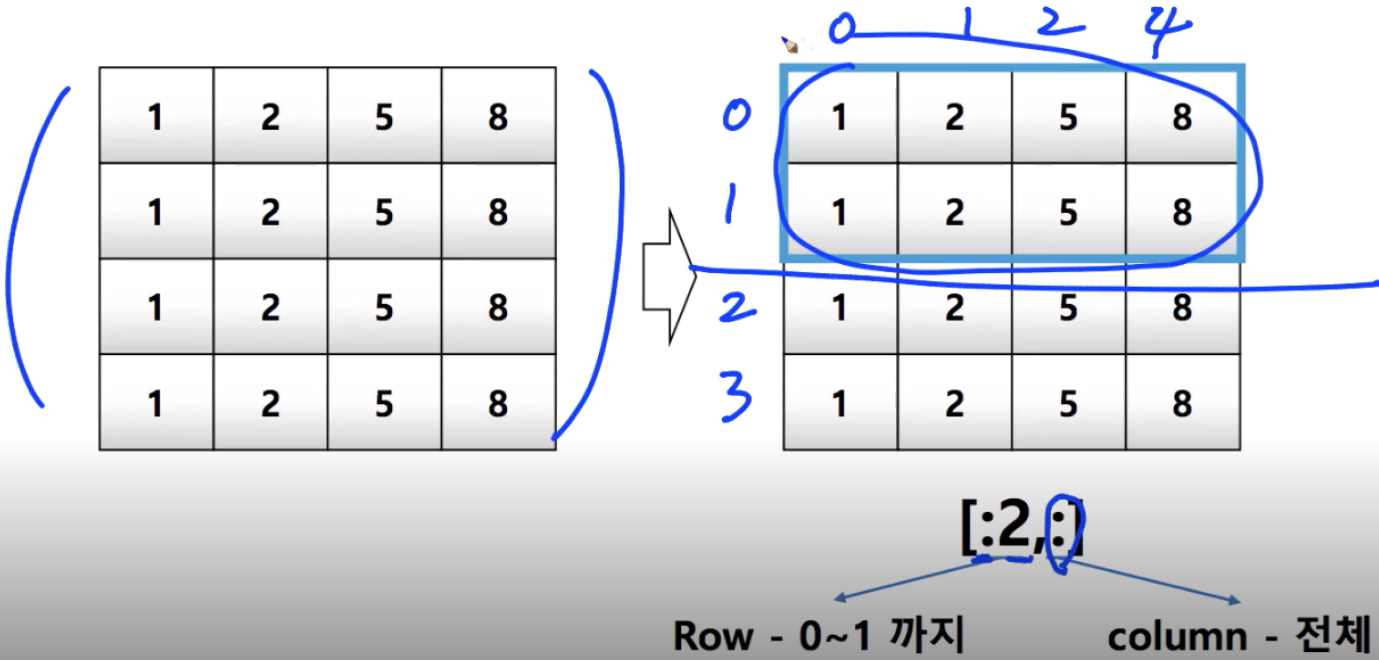

In [39]:
a[1, 1:3] # 1 Row / 1, 2 column

array([7, 8])

In [40]:
a[1:3] # 1 ~ 2 Row / All column

array([[ 6,  7,  8,  9, 10]])

example 2

In [44]:
test_example = np.array([
    [1, 2, 5, 8], [1, 2, 5, 8], [1, 2, 5, 8], [1, 2, 5, 8]], int)

test_example

array([[1, 2, 5, 8],
       [1, 2, 5, 8],
       [1, 2, 5, 8],
       [1, 2, 5, 8]])

In [45]:
test_example[:2, :]

array([[1, 2, 5, 8],
       [1, 2, 5, 8]])

In [46]:
test_example[:, 1:3]

array([[2, 5],
       [2, 5],
       [2, 5],
       [2, 5]])

In [47]:
test_example[1, :2]

array([1, 2])

뛰어넘기

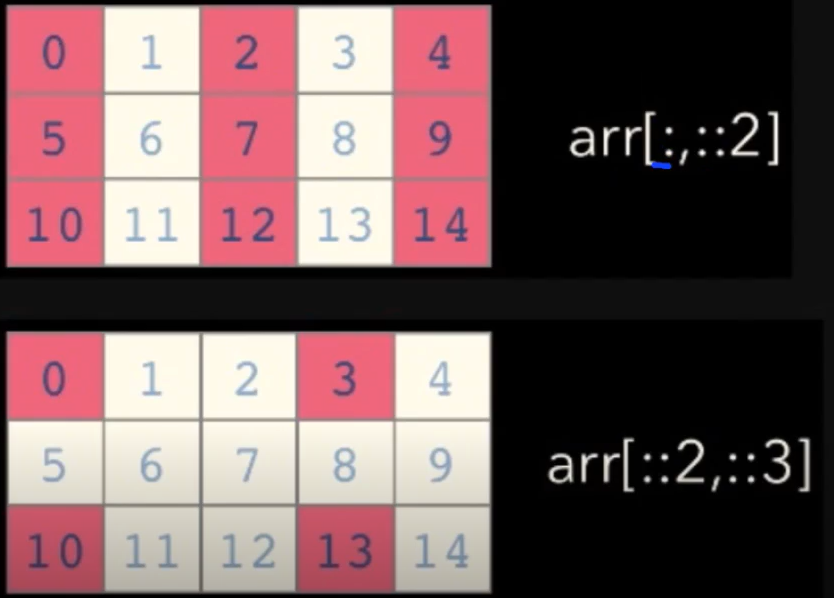

## Creation Function

### arange

- array의 범위를 지정하여, 값의 list를 생성하는 명령어

In [48]:
np.arange(30) # range: List의 range와 같은 효과, integer로 0부터 29까지 배열 추출.

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])

In [49]:
np.arange(0, 5, 0.5) # floating point도 표시 가능.
# (시작, 끝, step)

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5])

In [52]:
np.arange(0, 5, 0.5).tolist()

[0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5]

In [50]:
np.arange(30).reshape(5, 6)

array([[ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11],
       [12, 13, 14, 15, 16, 17],
       [18, 19, 20, 21, 22, 23],
       [24, 25, 26, 27, 28, 29]])

In [51]:
np.arange(30).reshape(-1, 5)

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24],
       [25, 26, 27, 28, 29]])

### ones, zeros and empty

- zeros: 0으로 가득 찬 ndarray 생성.
- np.zeros(shape, dtype, order)

In [54]:
np.zeros(shape=(10,), dtype=np.int8) # 10 - zero vector 생성.

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int8)

In [55]:
np.zeros((2, 5)) # 2 * 5 - zero matrix 생성.

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

- ones: 1로 가득 찬 ndarray 생성.

In [56]:
np.ones(shape=(10,), dtype=np.int8)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int8)

In [57]:
np.ones((2,5))

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])

- empty: shape만 주어지고 비어있는 ndarray 생성.
- memory initialization이 되지 않음.

In [58]:
np.empty(shape=(10,), dtype=np.int8)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int8)

In [59]:
np.empty((3, 5))

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

### something_like

- 기존 ndarray의 shape 크기 만큼 1, 0 또는 empty array 반환.

In [60]:
test_matrix = np.arange(30).reshape(5, 6)
np.ones_like(test_matrix)

array([[1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1]])

### identity

- 단위 행렬 (i 행렬) 생성.
- n -> number of rows

In [61]:
np.identity(n=3, dtype=np.int8)

array([[1, 0, 0],
       [0, 1, 0],
       [0, 0, 1]], dtype=int8)

In [62]:
np.identity(5)

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

### eye

- 대각선이 1인 행렬.
- k: 시작 index 변경 가능.

In [63]:
np.eye(N=3, M=5, dtype=np.int8)

array([[1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0]], dtype=int8)

In [64]:
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [65]:
np.eye(3, 5, k=2)

# k = start index

array([[0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

### diag

- 대각 행렬의 값을 추출.

In [66]:
matrix = np.arange(9).reshape(3, 3)
np.diag(matrix)

array([0, 4, 8])

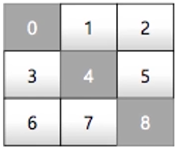

In [68]:
np.diag(matrix, k=1) # k=시작 위치

array([1, 5])

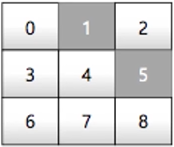

### random sampling

- 데이터 분포에 따른 sampling으로 array를 생성.

In [69]:
np.random.uniform(0, 1, 10).reshape(2, 5) # 균등분포

array([[0.08987645, 0.82104328, 0.62637951, 0.92690359, 0.41587919],
       [0.89445862, 0.24226099, 0.00636173, 0.38734511, 0.8680543 ]])

In [70]:
np.random.normal(0, 1, 10).reshape(2, 5) # 정규분포

array([[ 1.6679584 , -1.22528434, -1.73917248,  1.35447816,  0.72283774],
       [ 2.16237648, -1.73463282,  1.21453874, -0.80519898,  1.12580691]])

## Operation function

### sum

- ndarray의 element들 간 합을 구함.

In [71]:
test_array = np.arange(1, 11)
test_array

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [76]:
test_array.sum(dtype=np.float)

C:\Users\jjoro\AppData\Local\Temp/ipykernel_7328/3740136754.py:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  test_array.sum(dtype=np.float)


55.0

### axis

- 모든 operation function을 실행할 때, 기준이 되는 dimension 축.
- 차원이 늘어날수록 새로 생기는 축이 0이라고 생각하면 됨.

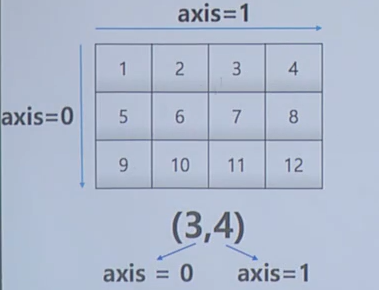

In [80]:
test_array = np.arange(1, 13).reshape(3, 4)
test_array

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12]])

In [84]:
test_array.sum()

78

In [83]:
# column 기준, row 기준.
test_array.sum(axis=1), test_array.sum(axis=0)

(array([10, 26, 42]), array([15, 18, 21, 24]))

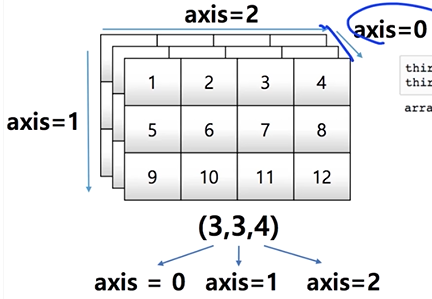

In [85]:
third_order_tensor = np.array([test_array, test_array, test_array])
third_order_tensor

array([[[ 1,  2,  3,  4],
        [ 5,  6,  7,  8],
        [ 9, 10, 11, 12]],

       [[ 1,  2,  3,  4],
        [ 5,  6,  7,  8],
        [ 9, 10, 11, 12]],

       [[ 1,  2,  3,  4],
        [ 5,  6,  7,  8],
        [ 9, 10, 11, 12]]])

### mean & std

- ndarray의 element들 간의 평균 또는 표준 편차를 반환.

In [86]:
test_array = np.arange(1, 13).reshape(3, 4)
test_array

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12]])

In [87]:
test_array.mean(), test_array.mean(axis=0)

(6.5, array([5., 6., 7., 8.]))

In [89]:
test_array.std(), test_array.std(axis=0)

(3.452052529534663, array([3.26598632, 3.26598632, 3.26598632, 3.26598632]))

## Mathematical functions

- 그 외에도 다양한 수학 연산자를 제공.

- exponential: exp, expm1, exp2, log, log10, log1p, log2, power, sqrt
- trigonometric: sin, cos, tan, acsin, arccos, atctan
- hyperbolic: sinh, cosh, tanh, acsinh, arccosh, atctanh

## concatenate

- numpy array를 합치는 함수.

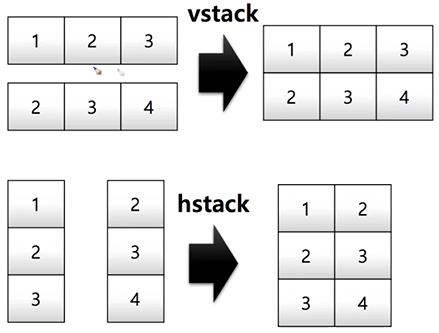

In [91]:
# vstack
# 2개의 vector.
a = np.array([1, 2, 3])
b = np.array([2, 3, 4])
np.vstack((a, b))

array([[1, 2, 3],
       [2, 3, 4]])

In [92]:
# hstack

a = np.array([ [1], [2], [3] ])
b = np.array([ [2], [3], [4] ])
np.hstack((a, b))

array([[1, 2],
       [2, 3],
       [3, 4]])

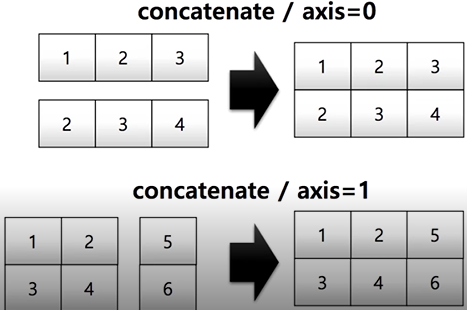

In [93]:
a = np.array([[1, 2, 3]])
b = np.array([[2, 3, 4]])
np.concatenate( (a, b), axis=0)

array([[1, 2, 3],
       [2, 3, 4]])

In [94]:
a = np.array([[1, 2], [3, 4]])
b = np.array([[5, 6]])

np.concatenate( (a, b.T), axis=1)

array([[1, 2, 5],
       [3, 4, 6]])

## array operations

### Operations b/t arrays

- Numpy는 array간의 기본적인 사칙 연산을 지원.

In [96]:
test_a = np.array([[1,2,3], [4,5,6]], float)

In [97]:
test_a + test_a # Matrix + Matrix 연산

array([[ 2.,  4.,  6.],
       [ 8., 10., 12.]])

In [98]:
test_a - test_a # Matrix - Matrix 연산

array([[0., 0., 0.],
       [0., 0., 0.]])

In [99]:
test_a * test_a # Matrix내 같은 위치 element들 간 연산.

array([[ 1.,  4.,  9.],
       [16., 25., 36.]])

dot product와 element wise product를 구분해야 함.

- elementwise : 같은 위치에 있는 것들끼리 곱해줌.
- dot: 선형대수 계산.

### Element-wise operations

- Array간 shape이 같을 때 일어나는 연산
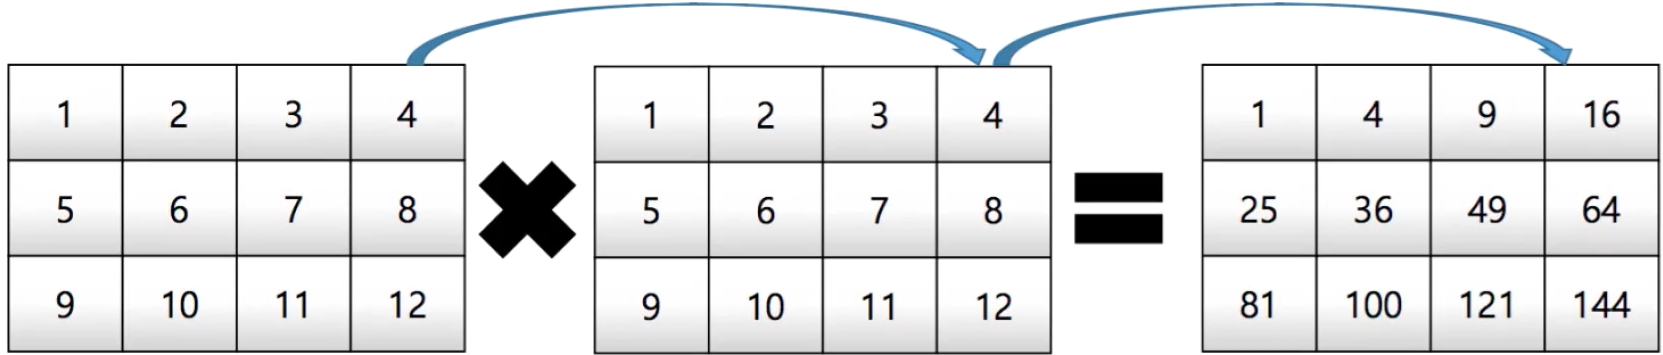

In [106]:
matrix_a = np.arange(1, 13).reshape(3, 4)
matrix_a * matrix_a

array([[  1,   4,   9,  16],
       [ 25,  36,  49,  64],
       [ 81, 100, 121, 144]])

### Dot product

- Matrix의 기본 연산
- dot 함수 사용

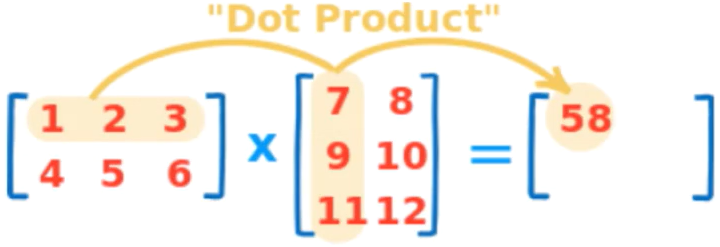

In [107]:
test_a = np.arange(1, 7).reshape(2, 3)
test_b = np.arange(7, 13).reshape(3, 2)

In [110]:
test_a, test_b

(array([[1, 2, 3],
        [4, 5, 6]]),
 array([[ 7,  8],
        [ 9, 10],
        [11, 12]]))

In [109]:
test_a.dot(test_b)

array([[ 58,  64],
       [139, 154]])

## Transpose

- 전치 행렬
- transpose 또는 T attribute 사용.

In [111]:
test_a = np.arange(1, 7).reshape(2, 3)
test_a

array([[1, 2, 3],
       [4, 5, 6]])

In [113]:
test_a.transpose()

array([[1, 4],
       [2, 5],
       [3, 6]])

In [115]:
test_a.T

array([[1, 4],
       [2, 5],
       [3, 6]])

In [112]:
test_a.T.dot(test_a) # Matrix 간 곱셈.

array([[17, 22, 27],
       [22, 29, 36],
       [27, 36, 45]])

## broadcasting

- Shape이 다른 배열 간 연산을 지원하는 기능.
- matrix * scalar 계산이 주됨.

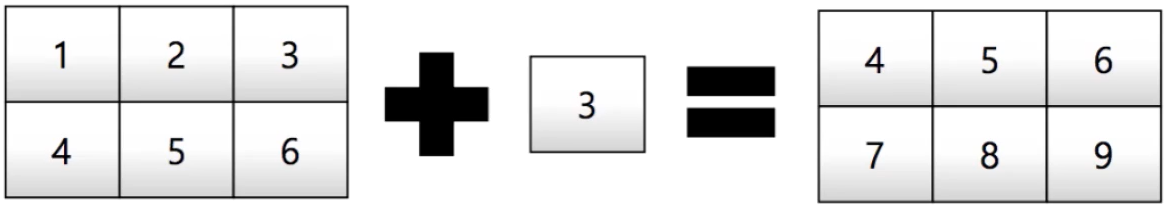

In [119]:
test_matrix = np.array([[1,2,3], [4,5,6]], float)
scalar = 3

In [117]:
test_matrix + scalar # Matrix - Scalar 덧셈

array([[4., 5., 6.],
       [7., 8., 9.]])

In [120]:
test_matrix - scalar # Matrix - Scalar 뺄셈

array([[-2., -1.,  0.],
       [ 1.,  2.,  3.]])

In [121]:
test_matrix * 5 # Matrix - Scalar 곱셈

array([[ 5., 10., 15.],
       [20., 25., 30.]])

In [122]:
test_matrix / 5 # Matrix - Scalar 나눗셈

array([[0.2, 0.4, 0.6],
       [0.8, 1. , 1.2]])

In [123]:
test_matrix // 0.2 # Matrix - Scalar 몫

array([[ 4.,  9., 14.],
       [19., 24., 29.]])

In [124]:
test_matrix ** 2 # Matrix - Scalar 제곱

array([[ 1.,  4.,  9.],
       [16., 25., 36.]])

### Scalar-vector 이외에도 vector-matrix 간의 연산도 지원.

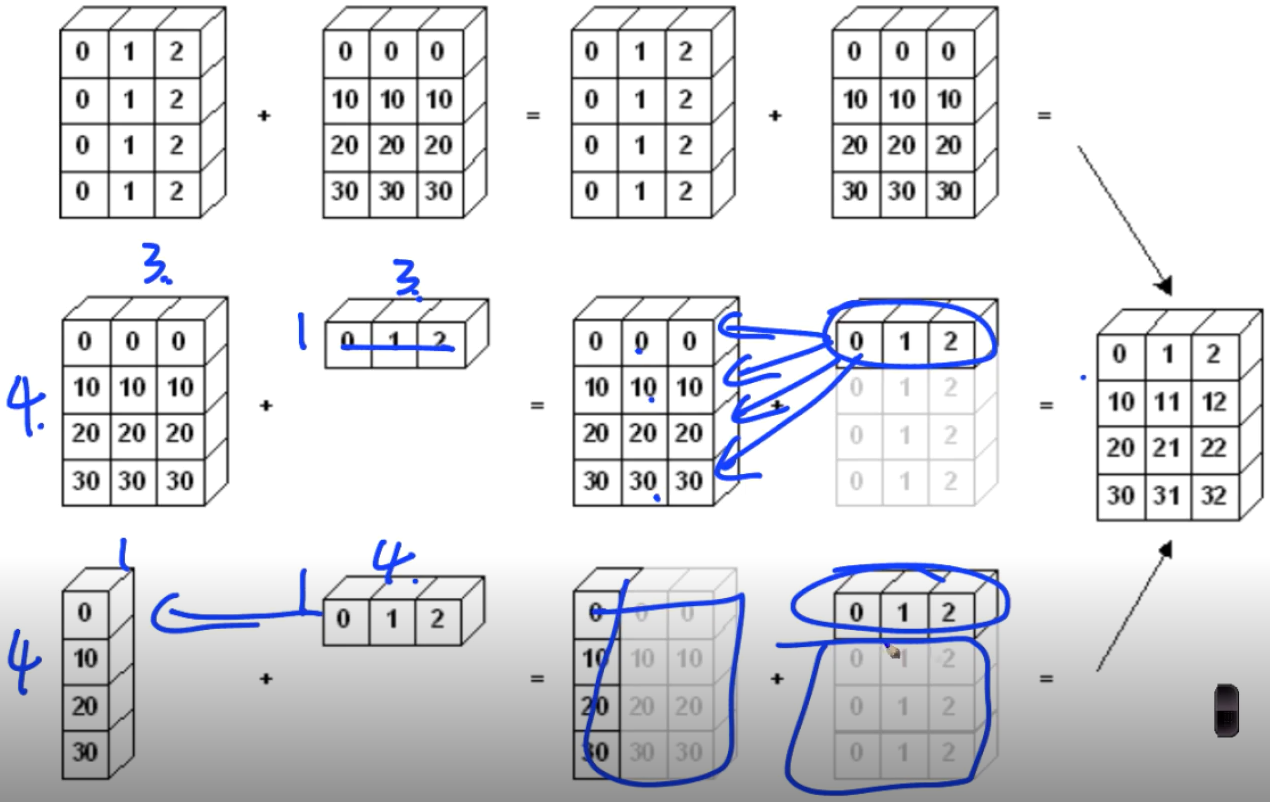

## Numpy performance

- 효율은 Numpy > List Comprehension > for loop.
- 다만, Numpy에서 concat을 하면 속도가 느림.
- concatenate처럼 계산이 아닌, 할당에서는 연산 속도의 이점이 없음.
    - list가 더 빠름.
    - list를 한 다음 numpy로 변환.

## Comparisons

### All & Any

- array의 데이터 전부 (and) 또는 일부 (or) 가 조건에 만족 여부 반환.

In [2]:
import numpy as np

In [3]:
a = np.arange(10)
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [7]:
a > 5 # broadcasting이라 생각하면 편함.

array([False, False, False, False, False, False,  True,  True,  True,
        True])

In [4]:
np.any(a>5), np.any(a<0) # any -> 하나라도 조건에 만족한다면 true

(True, False)

In [5]:
np.all(a>5), np.all(a<10) # all -> 모두가 조건에 만족한다면 true

(False, True)

Logical and

In [9]:
a = np.array([1, 3, 0], float)
np.logical_and(a > 0, a < 3) # and 조건의 condition

array([ True, False, False])

In [10]:
b = np.array([True, False, True], bool)
np.logical_not(b) # Not 조건의 condition

array([False,  True, False])

In [11]:
c = np.array([False, True, False], bool)
np.logical_or(b, c) # OR 조건의 condition

array([ True,  True,  True])

### np.where

In [26]:
np.where(a > 0, 3, 2) # where(condition, True, False)

array([2, 2, 2])

In [13]:
np.where(a > 5) # Index 값 반환.

(array([6, 7, 8, 9], dtype=int64),)

별로 안씀

In [15]:
a = np.array([1, np.NaN, np.Inf], float)
np.isnan(a) # Not a Number

array([False,  True, False])

In [16]:
np.isfinite(a) # is finite number

array([ True, False, False])

### argmax & argmin

- array내 최대값 또는 최소값의 index를 반환.

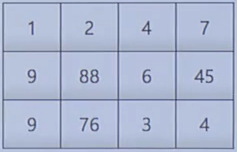

In [27]:
a = np.array([1, 2, 4, 5, 8, 78, 23, 3])
np.argmax(a), np.argmin(a) # array의 max와 min의 index값.

(5, 0)

- axis 기반의 반환

In [28]:
a = np.array([[1,2,4,7], [9,88,6,45], [9,76,3,4]])
np.argmax(a, axis=1), np.argmin(a, axis=0)

# 1 = row
# 0 = column

(array([3, 1, 1], dtype=int64), array([0, 0, 2, 2], dtype=int64))

## boolean index

- numpy는 배열은 특정 조건에 따른 값을 배열 형태로 추출할 수 있음.
- Comparison operation 함수들도 모두 사용가능

In [29]:
test_array = np.array([1, 4, 0, 2, 3, 8, 9, 7], float)
test_array > 3

array([False,  True, False, False, False,  True,  True,  True])

In [30]:
test_array[test_array > 3] # 조건이 True인 index의 column만 추출.

array([4., 8., 9., 7.])

In [31]:
condition = test_array < 3
test_array[condition]

array([1., 0., 2.])

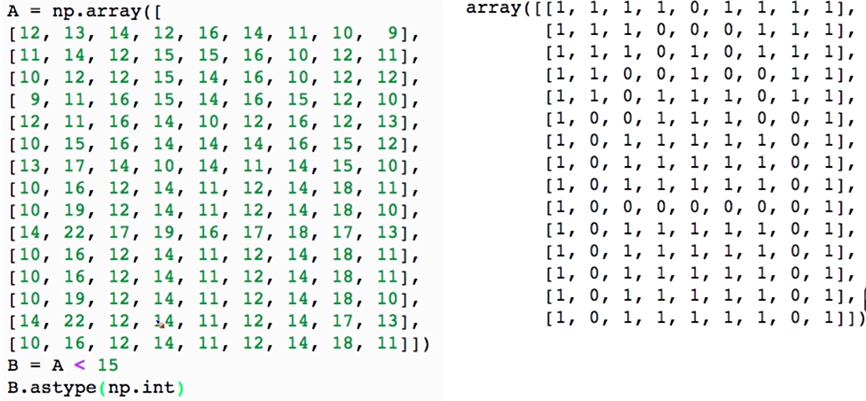

B를 기준으로 binary 형태로 바꿔주기.

### Fancy index

- array를 index value로 사용해서 값을 추출하는 방법.

In [32]:
a = np.array([2, 4, 6, 8], float)
b = np.array([0, 0, 1, 3, 2, 1], int) # 반드시 integer로 선언
a[b] # bracket index, b 배열의 값을 index로 하여 a의 값들을 추출함.

array([2., 2., 4., 8., 6., 4.])

In [33]:
a.take(b) # take 함수: bracket index와 같은 효과

array([2., 2., 4., 8., 6., 4.])

matrix 형태의 데이터도 가능

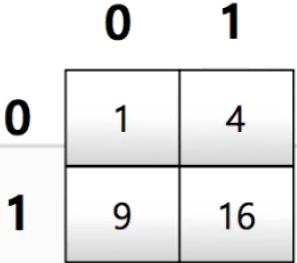

In [35]:
a = np.array([[1, 4], [9, 16]], float)
b = np.array([0, 0, 1, 1, 0], int)
c = np.array([0, 1, 1, 1, 1], int)
a[b, c] # b를 row index, c를 column index로 변환하여 표시함.

array([ 1.,  4., 16., 16.,  4.])